# Flight Price Prediction

## Introduction

The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

Octoparse scraping tool was used to extract data from the website. Data was collected in two parts: one for economy class tickets and another for business class tickets. A total of 300261 distinct flight booking options was extracted from the site. Data was collected for 50 days, from February 11th to March 31st, 2022.
Data source was secondary data and was collected from Ease my trip website.

## Features

The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

## EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Clean_Dataset.csv', index_col='Unnamed: 0')
df.sample(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
196411,Vistara,UK-822,Chennai,Morning,one,Evening,Bangalore,Economy,9.50,34,4755
40432,Air_India,AI-665,Delhi,Early_Morning,one,Early_Morning,Chennai,Economy,23.33,34,3988
264263,Vistara,UK-706,Kolkata,Morning,one,Morning,Mumbai,Business,25.25,6,82617
130415,Air_India,AI-402,Kolkata,Morning,one,Night,Mumbai,Economy,10.83,20,6048
159206,Air_India,AI-9885,Hyderabad,Morning,one,Morning,Mumbai,Economy,22.33,7,12249


In [3]:
df.shape

(300153, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [5]:
df.stops.unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [6]:
def get_metadata(data):
    metadata = data.columns
    numerical_cols = data.select_dtypes(include = ["float64", "int64"]).columns.tolist()
    categorical_cols = data.select_dtypes(include = ["object"]).columns.tolist()

    numerical_cols.remove('price')
    print("Numerical features: ", numerical_cols)
    print("Categorical features: ", categorical_cols)
    return metadata, numerical_cols, categorical_cols

metadata, numerical_cols, categorical_cols = get_metadata(df)
target_col = 'price'

Numerical features:  ['duration', 'days_left']
Categorical features:  ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


In [7]:
# function to filter missing data
def filter_missing(data):
    sns.displot(
        data = data.isna().melt(value_name="missing"),
        y = "variable",
        hue = "missing",
        multiple = "fill",
        aspect = 1.5
    )

    plt.show()

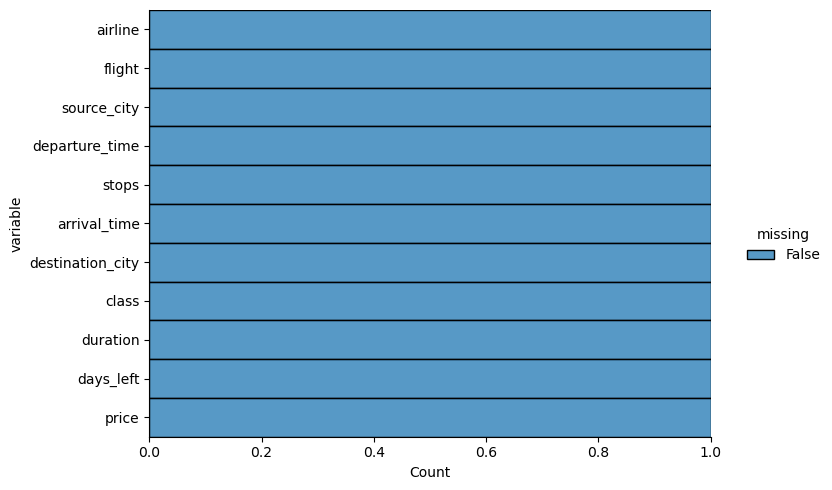

In [8]:
filter_missing(df)

We can see, that **there are no** missing values in our dataset

Now lets plot distribution for both categorical and numerical columns

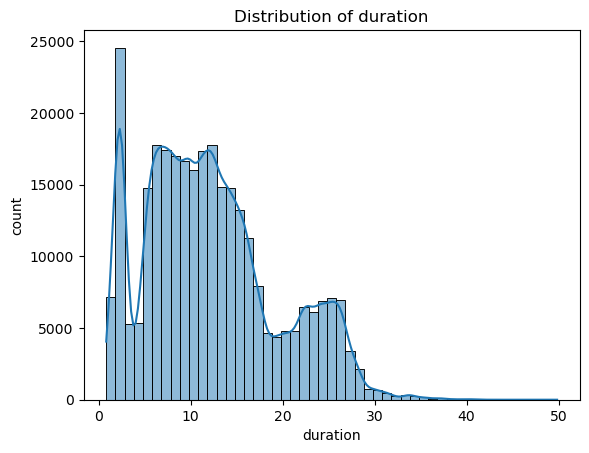

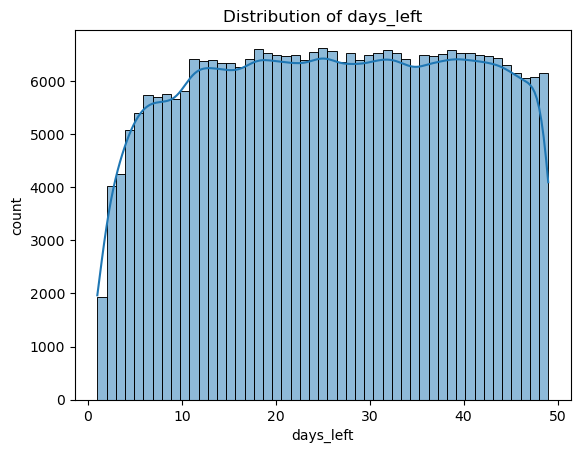

In [10]:
for col in numerical_cols:
    sns.histplot(data = df, x=col, kde = True, bins = df.days_left.nunique())
    plt.xlabel(col)
    plt.ylabel('count')
    plt.title(f'Distribution of {col}')
    plt.show();

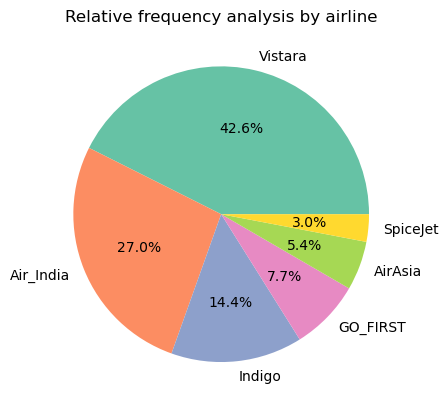

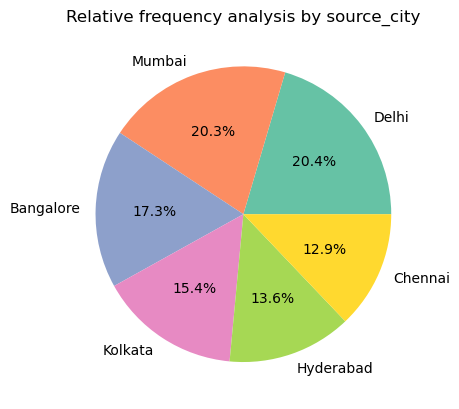

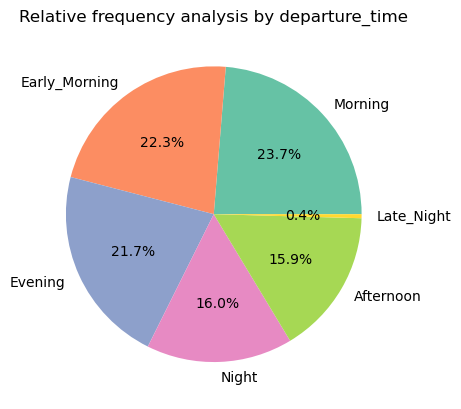

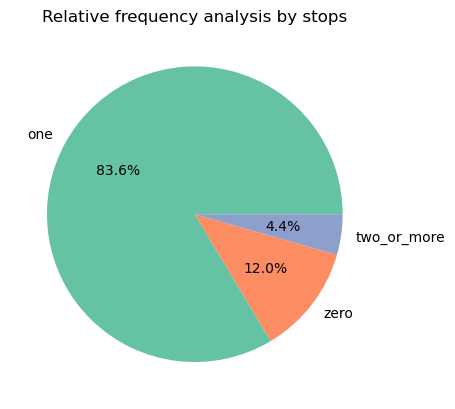

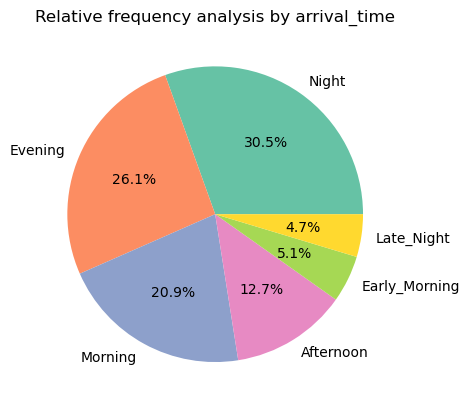

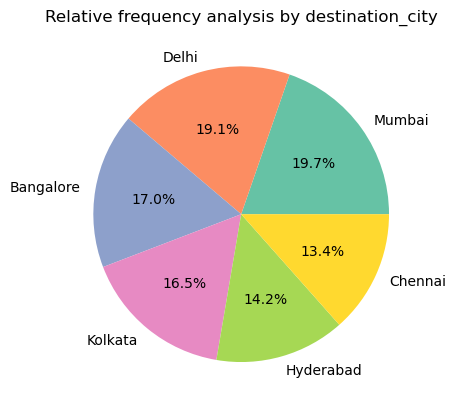

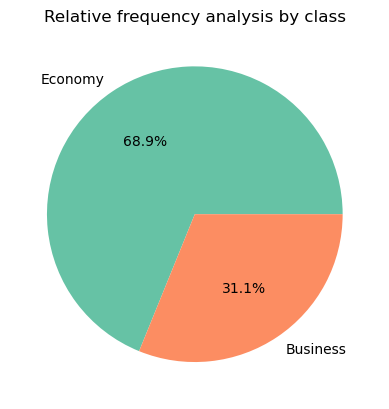

In [18]:
for i in range(len(categorical_cols)):
    if df[categorical_cols[i]].nunique() < 30:
        plt.pie(df[categorical_cols[i]].value_counts(normalize = True).values.tolist(), labels = df[categorical_cols[i]].value_counts(normalize = True).index.tolist(), autopct='%1.1f%%', colors = sns.color_palette("Set2"))
        plt.title("Relative frequency analysis by " + categorical_cols[i])
        plt.show();

For categorical columns with <= 3 unique values let's plot distribution of target value,
depending on this categorical columns.

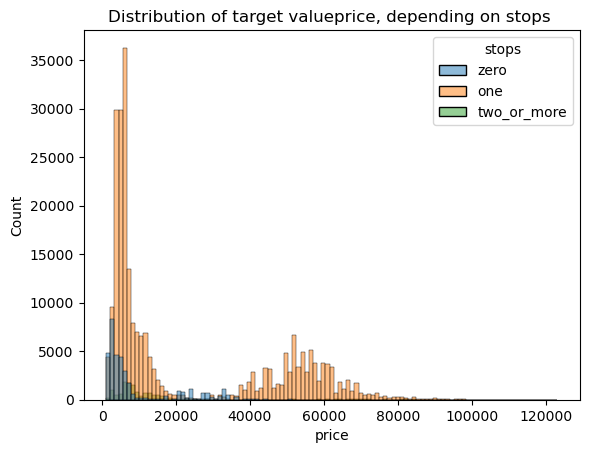

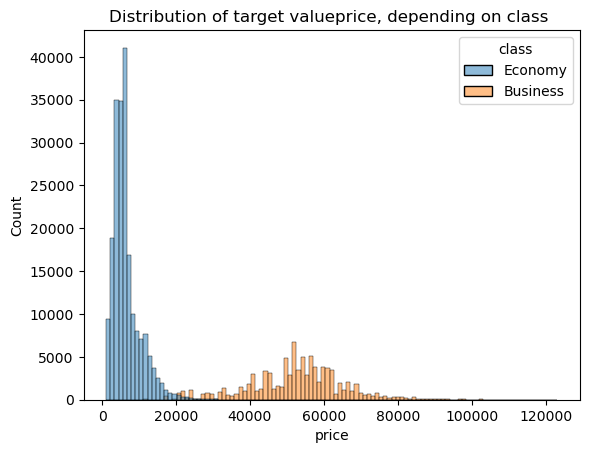

In [21]:
for i in range(len(categorical_cols)):
    if df[categorical_cols[i]].nunique() <= 3: 
        sns.histplot(data = df, x = target_col, hue = categorical_cols[i])
        plt.title(f"Distribution of target value{target_col}, depending on {categorical_cols[i]} ")
        plt.show();

Also lets plot:
- distribution of target value
- log distribution of target value (because price usually has log-normal distribution)
- correlation matrix for numerical columns

Text(0.5, 1.0, 'Distribution for price')

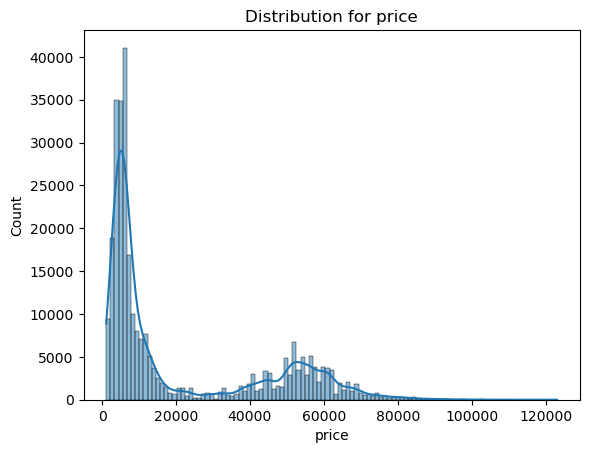

In [23]:
sns.histplot(data = df, x = target_col, kde = True)
plt.title(f'Distribution for {target_col}')

Text(0.5, 1.0, 'Log distribution for price')

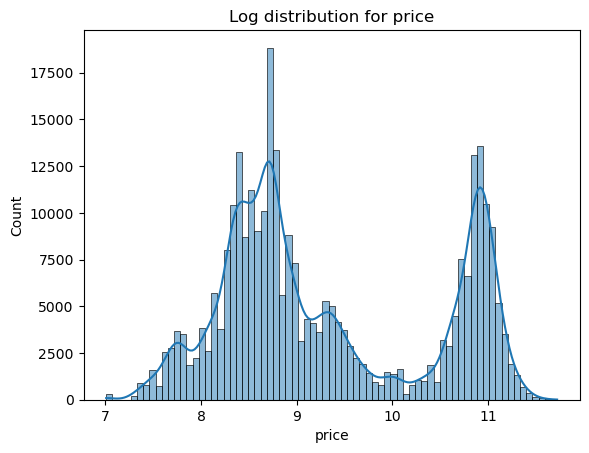

In [27]:
sns.histplot(np.log(df[target_col]), kde = True)
plt.title(f'Log distribution for {target_col}')

We see bimodal distribution

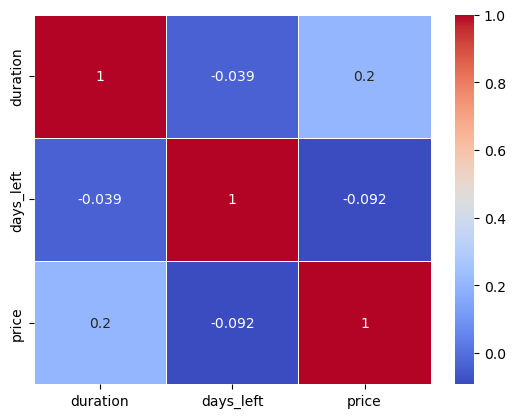

In [30]:
corr = df[numerical_cols + ['price']].corr()

sns.heatmap(corr, annot = True, cmap = 'coolwarm', linewidths = 0.5);

In [33]:
df.groupby('flight', as_index = False)['price'].mean()

,flight,price
0,6E-102,2067.435897
1,6E-105,4079.000000
2,6E-113,5073.938776
3,6E-121,1702.000000
4,6E-123,6249.400000
...,...,...
1556,UK-988,37685.530775
1557,UK-993,30494.012075
1558,UK-994,36401.095837
1559,UK-995,31270.540039


## Data Preprocessing

In [57]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

data = df.copy()

dummy_transformer = make_column_transformer(
    (StandardScaler(), numerical_cols),  
    (OneHotEncoder(drop='first', sparse_output = False, handle_unknown="ignore"), categorical_cols),
)

ordinal_transformer = make_column_transformer(
    (StandardScaler(), numerical_cols),  
    (OrdinalEncoder(
        categories = [df[categorical_cols[i]].unique() for i in range(len(categorical_cols))], dtype = np.int64), 
        categorical_cols
    )
)

In [58]:
categorical_cols

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class']

In [68]:
# split train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns = ['price']), data['price'], test_size = 0.2, random_state = 42)

print("X-train dim: ", x_train.shape)
print("Y-train: ", len(y_train))
print("X-test dim: ", x_test.shape)
print("Y-test: ", len(y_test))

X-train dim:  (240122, 10)
Y-train:  240122
X-test dim:  (60031, 10)
Y-test:  60031


In [69]:
x_train

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
148417,Air_India,AI-424,Kolkata,Afternoon,one,Morning,Chennai,Economy,19.42,6
36879,Indigo,6E-2193,Delhi,Afternoon,two_or_more,Night,Chennai,Economy,7.00,13
274531,Air_India,AI-768,Kolkata,Afternoon,one,Afternoon,Chennai,Business,21.17,44
166397,Vistara,UK-876,Hyderabad,Night,one,Early_Morning,Bangalore,Economy,10.25,11
272722,Vistara,UK-774,Kolkata,Night,one,Night,Chennai,Business,26.50,5
...,...,...,...,...,...,...,...,...,...,...
119879,Vistara,UK-776,Kolkata,Evening,one,Afternoon,Delhi,Economy,20.50,2
259178,Vistara,UK-866,Bangalore,Night,one,Night,Chennai,Business,25.42,7
131932,Air_India,AI-770,Kolkata,Night,one,Morning,Mumbai,Economy,13.67,29
146867,GO_FIRST,G8-102,Kolkata,Afternoon,one,Night,Hyderabad,Economy,8.33,39


In [70]:
ordinal_transformer.fit(x_train)

x_test_ord = ordinal_transformer.transform(x_test)
x_train_ord = ordinal_transformer.transform(x_train)

In [71]:
dummy_transformer.fit(x_train)

x_test_dum = dummy_transformer.transform(x_test)
x_train_dum = dummy_transformer.transform(x_train)

C:\Users\p1tsa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Building Models

I will use such models:
- **Linear Regression**
- **XGBoost**
- **CatBoost** because i have a lot categorical columns

In [89]:
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [120]:
mse_scores = [0, 0, 0]
r2_scores = [0, 0, 0]
mae_scores = [0, 0, 0]

In [125]:
import pickle

# function to save model
def save_model(filename, model):
    with open(filename, "wb") as file:
        pickle.dump(model, file)

Before this, I transformed the data using one-hot encoding and ordinal encoding, because linear regression can only accept one-hot encoded data due to scaling issues. Other models, however, can easily work with ordinal encoded data.

In [126]:
linear_reg = LinearRegression(n_jobs = -1)

linear_reg.fit(x_train_dum, y_train)
y_pred = linear_reg.predict(x_test_dum)

In [128]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Linear Regression mse:", mse)
print("Linear Regression r2-score:", r2)
print("Linear Regression mae:", mae)

mse_scores[0], r2_scores[0], mae_scores[0] = mse, r2, mae

save_model('models/lin_reg.pkl', linear_reg)

Linear Regression mse: 2.100667143797525e+26
Linear Regression r2-score: -4.0751491399574944e+17
Linear Regression mae: 102459322023.6314


We can see, that Linear Regression shows **awful** score, mse and mae are very high

In [129]:
xgboost_model = XGBRegressor(objective='reg:squarederror', n_estimators=1500, learning_rate=0.3)

xgboost_model.fit(x_train_ord, y_train)
y_pred = xgboost_model.predict(x_test_ord)

In [130]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("XGBoost mse:", mse)
print("XGBoost r2-score:", r2)
print("XGBoost mae:", mae)

mse_scores[1], r2_scores[1], mae_scores[1] = mse, r2, mae

save_model('models/xgboost.pkl', xgboost_model)

XGBoost mse: 4312541.140604136
XGBoost r2-score: 0.991633951663971
XGBoost mae: 1080.3255092295942


XGBoost performs **much better**, with an MAE value close to `1000`, indicating that on average we will make an error of 1000 units in monetary terms. Additionally, the R² score close to 1 (`0.991`) means that the model almost perfectly explains the variation in the target variable based on the data

Now lets perform catboost model

In [134]:
catboost_model = CatBoostRegressor(cat_features=categorical_cols, iterations=500,\
                                    depth=5, learning_rate=0.2, loss_function='RMSE')

catboost_model.fit(x_train, y_train)
y_pred = catboost_model.predict(x_test)

0:	learn: 18515.4217561	total: 165ms	remaining: 1m 22s
1:	learn: 15199.0339442	total: 268ms	remaining: 1m 6s
2:	learn: 12650.0691756	total: 393ms	remaining: 1m 5s
3:	learn: 10667.2470057	total: 530ms	remaining: 1m 5s
4:	learn: 9173.7954611	total: 654ms	remaining: 1m 4s
5:	learn: 8059.1327908	total: 773ms	remaining: 1m 3s
6:	learn: 7251.0805617	total: 931ms	remaining: 1m 5s
7:	learn: 6675.2289629	total: 1.04s	remaining: 1m 4s
8:	learn: 6223.6642898	total: 1.14s	remaining: 1m 2s
9:	learn: 5884.5758064	total: 1.26s	remaining: 1m 1s
10:	learn: 5659.4987064	total: 1.38s	remaining: 1m 1s
11:	learn: 5500.6263161	total: 1.51s	remaining: 1m 1s
12:	learn: 5368.2355488	total: 1.65s	remaining: 1m 1s
13:	learn: 5209.7345311	total: 1.8s	remaining: 1m 2s
14:	learn: 5141.9059676	total: 1.92s	remaining: 1m 2s
15:	learn: 5045.7535692	total: 2.02s	remaining: 1m 1s
16:	learn: 4985.6059824	total: 2.12s	remaining: 1m
17:	learn: 4927.9033153	total: 2.21s	remaining: 59s
18:	learn: 4888.8872968	total: 2.31s	re

In [136]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("CatBoost mse:", mse)
print("CatBoost r2-score:", r2)
print("CatBoost mae:", mae)

mse_scores[2], r2_scores[2], mae_scores[2] = mse, r2, mae

save_model('models/catboost.pkl', catboost_model)

CatBoost mse: 10245177.020549746
CatBoost r2-score: 0.980125064340974
CatBoost mae: 1821.047215053482


This model also gives a decent result, but XGBoost performs exceptionally well, so I don't think it's worth tuning the hyperparameters to achieve better performance here.

## Evaluation process

I will not show Linear Regression scores on plots just because it's values are too high in contrast to Boosting models

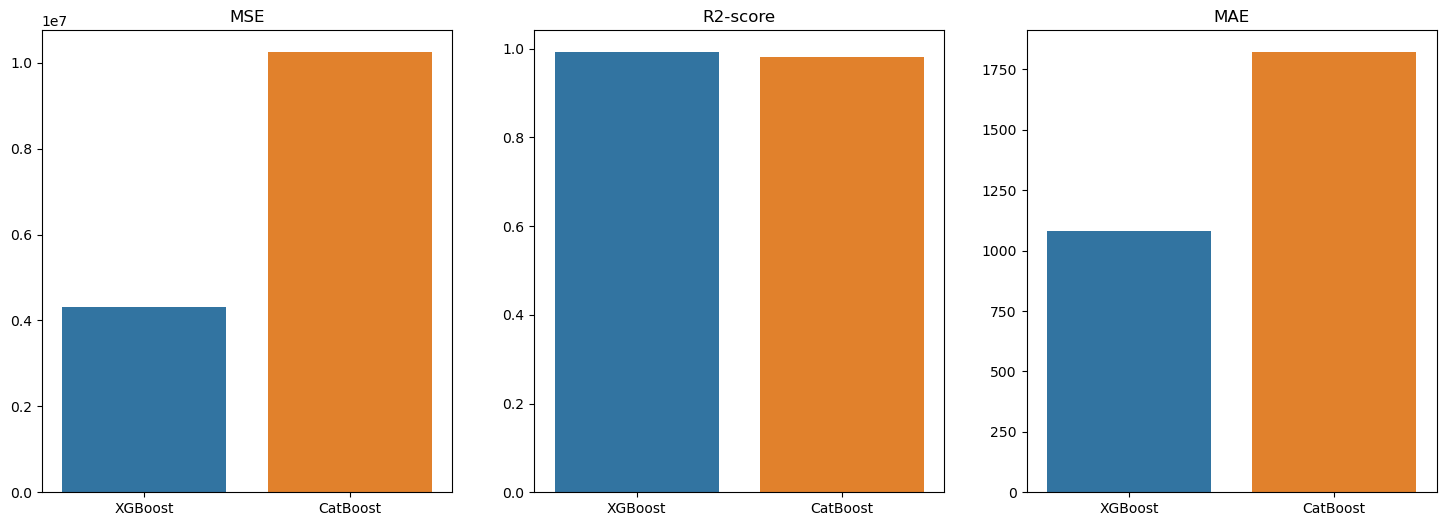

In [142]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
models = ['XGBoost', 'CatBoost']
scores = [mse_scores[1:], r2_scores[1:], mae_scores[1:]]
for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.barplot(x = models, y = scores[i], hue = models)
    ax[0].set_title('MSE')
    ax[1].set_title('R2-score')
    ax[2].set_title('MAE')

To summarize, the best performance was shown by the **XGBoost model**, with CatBoost being quite close to it. The Linear Regression model had the lowest score, which is not surprising given that our data contains a large number of categorical features.

Final score of the best model: **XGBoost R²-score**: `0.991633951663971`.